In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "logistic_normal",
    "decoder_type": "sage",
    "decoder_estimate_interactions": False
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):

    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")
with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))


100%|██████████| 5000/5000 [01:15<00:00, 65.97it/s]


Epoch   1	Iter   10	Loss:3.0631635	Rec Loss:1.9898789	MMD:1.0732592	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.5388305	Rec Loss:3.6789340	MMD:1.8598490	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9494412	Rec Loss:1.9478618	MMD:0.0007613	Sparsity_Loss:0.0008181	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7450878	Rec Loss:3.7434028	MMD:0.0001825	Sparsity_Loss:0.0015026	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9552594	Rec Loss:1.9544672	MMD:0.0000305	Sparsity_Loss:0.0007618	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6960810	Rec Loss:3.6946945	MMD:0.0000072	Sparsity_Loss:0.0013794	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9728389	Rec Loss:1.9721119	MMD:0.0000000	Sparsity_Loss:0.0007270	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6879459	Rec Loss:3.6866565	MMD:-0.0000217	Sparsity_Loss:0.0013110	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9489204	Rec Loss:1.9482359	MMD:-0.0000115	Sparsity_Loss:0.0006959	Pred_Loss:

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:17<00:00, 64.82it/s]


Epoch   1	Iter   10	Loss:3.1526685	Rec Loss:2.0511198	MMD:1.1015232	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.4947600	Rec Loss:3.6547751	MMD:1.8399371	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9919379	Rec Loss:1.9902235	MMD:0.0008953	Sparsity_Loss:0.0008191	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7425598	Rec Loss:3.7408106	MMD:0.0002480	Sparsity_Loss:0.0015012	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9861928	Rec Loss:1.9853784	MMD:0.0000541	Sparsity_Loss:0.0007603	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7594959	Rec Loss:3.7580916	MMD:0.0000293	Sparsity_Loss:0.0013749	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9478174	Rec Loss:1.9470952	MMD:-0.0000038	Sparsity_Loss:0.0007261	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6233471	Rec Loss:3.6220310	MMD:0.0000071	Sparsity_Loss:0.0013088	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9855735	Rec Loss:1.9848701	MMD:0.0000078	Sparsity_Loss:0.0006957	Pred_Loss:0

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:23<00:00, 59.89it/s]


Epoch   1	Iter   10	Loss:3.0003054	Rec Loss:1.9514439	MMD:1.0488360	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.6364791	Rec Loss:3.7496318	MMD:1.8867996	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9767773	Rec Loss:1.9752293	MMD:0.0007293	Sparsity_Loss:0.0008187	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7466626	Rec Loss:3.7450158	MMD:0.0001457	Sparsity_Loss:0.0015011	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9882742	Rec Loss:1.9874645	MMD:0.0000503	Sparsity_Loss:0.0007594	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7569504	Rec Loss:3.7555822	MMD:-0.0000073	Sparsity_Loss:0.0013756	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9915380	Rec Loss:1.9908072	MMD:0.0000039	Sparsity_Loss:0.0007270	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6982498	Rec Loss:3.6969755	MMD:-0.0000362	Sparsity_Loss:0.0013104	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9539404	Rec Loss:1.9532534	MMD:-0.0000076	Sparsity_Loss:0.0006946	Pred_Loss

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:26<00:00, 58.05it/s]


Epoch   1	Iter   10	Loss:3.0119488	Rec Loss:1.9541278	MMD:1.0577955	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.6179343	Rec Loss:3.7321925	MMD:1.8856939	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9479645	Rec Loss:1.9464618	MMD:0.0006839	Sparsity_Loss:0.0008188	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6201039	Rec Loss:3.6184623	MMD:0.0001417	Sparsity_Loss:0.0014999	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9481064	Rec Loss:1.9473159	MMD:0.0000305	Sparsity_Loss:0.0007599	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7525233	Rec Loss:3.7511476	MMD:0.0000000	Sparsity_Loss:0.0013758	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9678297	Rec Loss:1.9671065	MMD:-0.0000039	Sparsity_Loss:0.0007270	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7422784	Rec Loss:3.7410047	MMD:-0.0000368	Sparsity_Loss:0.0013103	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9124745	Rec Loss:1.9117901	MMD:-0.0000113	Sparsity_Loss:0.0006957	Pred_Loss

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:28<00:00, 56.76it/s]


Epoch   1	Iter   10	Loss:2.9910948	Rec Loss:1.9431002	MMD:1.0479692	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.5919270	Rec Loss:3.7176168	MMD:1.8742627	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9894513	Rec Loss:1.9878894	MMD:0.0007444	Sparsity_Loss:0.0008174	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6319048	Rec Loss:3.6302668	MMD:0.0001418	Sparsity_Loss:0.0014962	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9955430	Rec Loss:1.9947550	MMD:0.0000312	Sparsity_Loss:0.0007567	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7544091	Rec Loss:3.7530260	MMD:0.0000147	Sparsity_Loss:0.0013684	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9809384	Rec Loss:1.9802027	MMD:0.0000116	Sparsity_Loss:0.0007241	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6994277	Rec Loss:3.6981307	MMD:-0.0000072	Sparsity_Loss:0.0013043	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9682218	Rec Loss:1.9675221	MMD:0.0000077	Sparsity_Loss:0.0006919	Pred_Loss:0

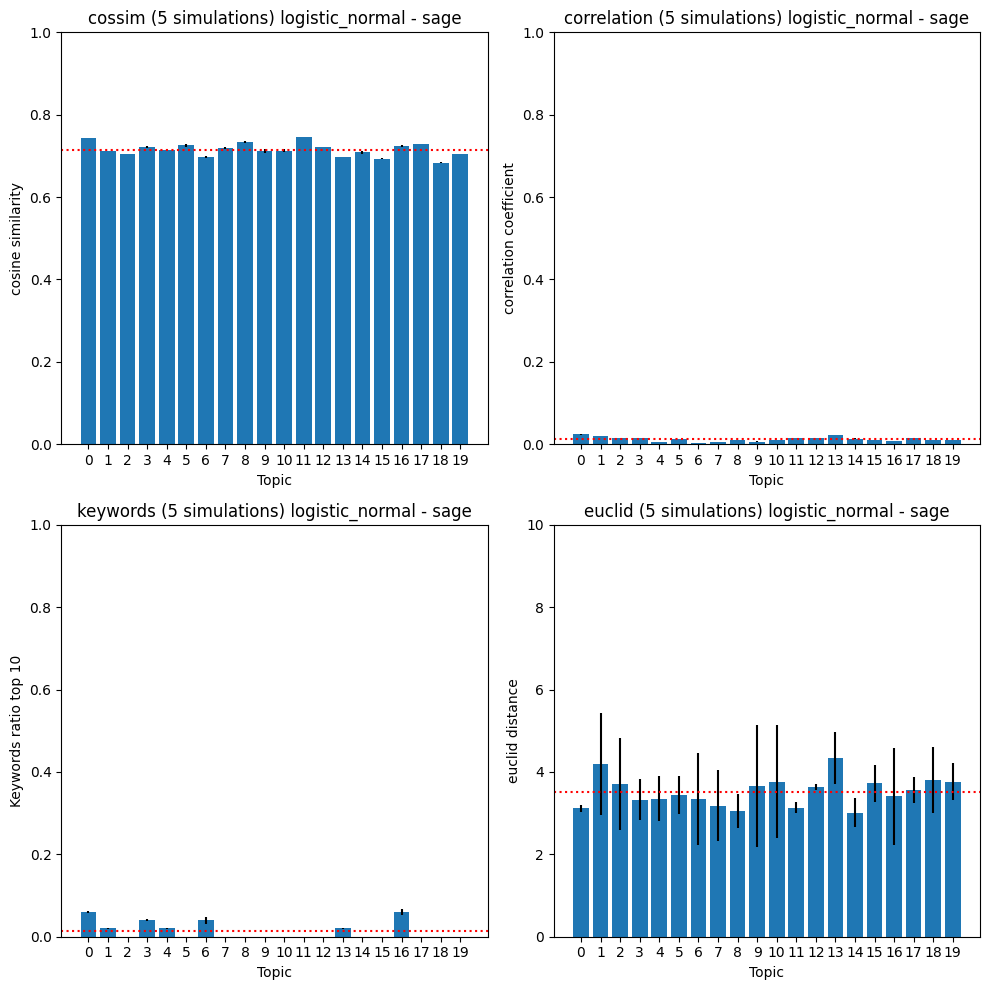

In [3]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()